In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

Fortney et al 2016. "THE HUNT FOR PLANET NINE: ATMOSPHERE, SPECTRA, EVOLUTION, AND DETECTABILITY"

An addition, we do not include the effects of the hypothesized, and potentially optically thick (at least at short wavelengths) CH4 cloud, given the large uncertainties on its location and optical properties. This could depress the 3–5 μm flux compared to the cloud-free case, which emerges from deep, hotter atmospheric layers. Even with potentially dramatic flux enhancements, given the faintness of the planet in the mid-infared, we expect that in the near future a detection in the optical is the most likely and we next turn to what information may be gleaned from an optical spectrum.

In [4]:
Mearth = 5.972e24 #kg
Tint = [20, 30, 40, 50, 60] #intrinsic flux #K

In [5]:
#// ----- Constants ----- //

#// Neptune //
M_Neptune = 17.15  #Mearth
R_nep = 3.89 #r-earth #Neptune radius
A0_nep = 0.41 #geometric albedo
r_nep = 30.07 #AU  #distance from sun

bond_albedo_nep = 0.31      #values from Table 4.1 in de Pater and Lissauer 2010
effective_temp_nep = 59.3 #K
equalibrium_temp = 46 #K
temp_at_1_bar = 71.5 #K
tropopause_temp = 52 #K
mesosphere_temp = 145 #K
exobase_temp = 750  #K
tropopause_pressure = 140 #mbar
scale_height_1_bar = 23 #km
adiabatic_lapse_rate = 1.3 #K/km
energy_balance = 2.68


#// -- Planet 9 estimations -- // 
# from Fortney et al 2016

M_p9 =  10 #np.arange(5,20) #Mearth  masses of 5–20 M ⊕
R_p9 = 3.46 #5.09 #np.arange(2.7, 6, 0.1) #Possible radii span from 2.7 to 6 R⊕, depending on the mass fraction of any H/He envelope 
A_p9 = 0.75 #in the V band
r_p9 = 622 #au # motivated by Fienga et al. 2016
effective_temp_p9 = np.arange(35, 50) #~35 to 50 K 
e_p9 = 0.6
#a_p9 = 700 #AU #semi major axis

In [10]:
V = 7.8 + 5 * np.log10((R_p9/R_nep)**2 * (A_p9/A0_nep)* (r_p9/r_nep)**4)
print(V)

34.915791139836536


As a consequence, its detectability is strongly influenced by its current radial distance from the Sun, which, as a function of true anomaly, ν, is given by: 


8


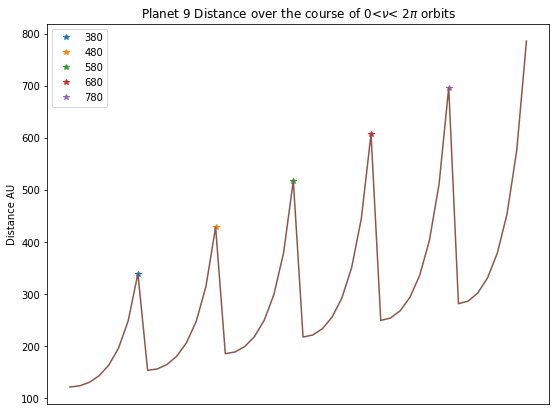

In [290]:
r_p9 = []
nu_list = []
e_p9 = 0.6
nu_p9 = 118 #degrees
a_p9 = np.arange(380, 980, 100)#AU #semi major axis
nu_range = np.arange(0,360, 50)
print(len(nu_range))

for a in a_p9:
    for nu in nu_range:
        r = a * (1-e_p9**2) / (1 + np.cos(nu))
        r_p9.append(r)
        nu_list.append(nu)

r_p9 = np.array(r_p9)
# print(np.int(np.max(r_p9)))
a_list = argrelextrema(r_p9, np.greater)
# print(a_list[0])
# print(a_p9)

plt.figure(figsize=(9,7))
frame1 = plt.gca()
for i in range(len(a_list[0])):
    plt.plot(10 * a_list[0][i], r_p9[a_list[0][i]], '*', label = a_p9[i])
    
    
plt.legend()
plt.plot(10 * np.arange(0,len(r_p9)), r_p9)
frame1.axes.get_xaxis().set_visible(False)
plt.ylabel('Distance AU')
plt.xlabel('True anomaly')
plt.title('Planet 9 Distance over the course of 0<' r'$ \nu$'  '< 2$\pi$ orbits')
plt.show()

### Why V-band? 
Atmosphere is strongly depleted in molecular absorption at visible wavelengths, suggesting a Rayleigh scattering atmosphere with a high geometric albedo approaching 0.75.

In [287]:
V_list = []

V = 7.8 + 5 * np.log10((R_p9/R_nep)**2 * (A_p9/A0_nep)* (r_p9 /r_nep)**4)
V_list.append(V)
# print(V_list[0])
#print(r_p9)

window = len(nu_range)

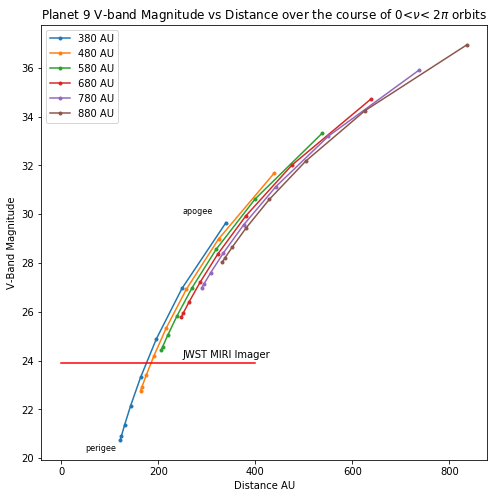

In [292]:
plt.figure(figsize=(8,8))

plt.plot(r_p9[0:window], V_list[0][0:window], marker = '.', label = '380 AU')
plt.plot(r_p9[window: window*2]+10, V_list[0][window: window*2], marker = '.', label = '480 AU')
plt.plot(r_p9[window*2: window*3]+20, V_list[0][window*2: window*3], marker = '.', label = '580 AU')
plt.plot(r_p9[window*3: window*4]+30, V_list[0][window*3: window*4], marker = '.', label = '680 AU')
plt.plot(r_p9[window*4: window*5]+40, V_list[0][window*4: window*5], marker = '.', label = '780 AU')
plt.plot(r_p9[window*5: window*6]+50, V_list[0][window*5: window*6], marker = '.', label = '880 AU')

plt.plot(23.9 + np.zeros(400), 'r')
plt.text(250, 24.1 , 'JWST MIRI Imager', fontsize=10)
plt.text(50, 20.3 , 'perigee', fontsize=8)
plt.text(250, 30 , 'apogee', fontsize=8)

plt.xlabel('Distance AU')
plt.ylabel('V-Band Magnitude')
plt.title('Planet 9 V-band Magnitude vs Distance over the course of 0<' r'$ \nu$'  '< 2$\pi$ orbits')
plt.legend()
plt.show()

In [247]:
# NOTE: a blackbody is an object that absorbs all radiation that falls on it, nothing is reflected or scattered

convert_to_micron = 1000000
convert_to_nm = 1e+9

c = 2.998e8 #m/s
h = 6.62607004e-34 #m2*kg/s #Planks constant
k = 1.38064852e-23 #m2*kg/s2*K #Boltzmann Constant


#// ------ calculate peak brightness for a blackbody----- ///

T1 = 40 #K    #for a blackbody radiator
T2 = 50 #K


def lambdamax(T):
    lambdamax = 2.9e-3 / T  #m
    return lambdamax

def vmax(T):
    vmax = c/ lambdamax(T)     #HZ
    return vmax

def Bv(T):
    BvT = (2*h*(vmax(T)**3)/c**2)*(1/(np.exp(h*vmax(T)/(k*T)) - 1))
    return BvT

def FluxDensity(T):
    FluxDensity = np.pi * Bv(T) #W/m2*Hz #Jansky
    #FluxDensity = 1.83e-12 #W/m2/Hz
    return FluxDensity #* vmax(T)/ lambdamax(T)

def Magnitude(FluxDensity, T):
    #magnitude = -2.5*np.log10(FluxDensity(T))-48.6
    
    m2 = 0.03 #7.8 #Neptune's visual magnitude at opposition
    f2 = 3680 #2.87 #Neptune flux density #Jansky
    f1 = FluxDensity(T)
    m1 = m2 - 2.5*np.log10(f1/f2)
    return  m1 

def Temperature_to_Magnitude(T):
    print(T, 'K')
    print('max wavelength = ', lambdamax(T) * convert_to_micron, 'um, or ', lambdamax(T) * convert_to_nm, 'nm')
    print('max frequency = ', np.format_float_scientific(vmax(T)), 'Hz')
    print('Brightness = ', Bv(T), 'W/m2*Hz*sr')
    print('Flux Density= ', np.format_float_scientific(FluxDensity(T)), 'W/m2*Hz, aka Jansky') 
    print('V-band Magnitude = ', Magnitude(FluxDensity, T))

In [248]:
Temperature_to_Magnitude(40)

40 K
max wavelength =  72.5 um, or  72500.0 nm
max frequency =  4.1351724137931035e+12 Hz
Brightness =  7.352511505444192e-15 W/m2*Hz*sr
Flux Density=  2.30985961309379e-14 W/m2*Hz, aka Jansky
V-band Magnitude =  43.03565558300477
